In [1]:
# imports
import os
import matplotlib.pyplot as plt
import helpers as h # contains the computations
import numpy as np
import pandas as pd
import json

# read in the files from data directory

left_file_path = "data/hifim/sub_2/5_springs/5-springs_Left-Ankle.csv"
right_file_path = "data/hifim/sub_2/5_springs/5-springs_Right-Ankle.csv"

# reads the csv into a pandas data frame
left_data = pd.read_csv(left_file_path)
right_data = pd.read_csv(right_file_path)

# view the data frame 
left_data.head(5)

,PacketCounter,SampleTimeFine,Quat_W,Quat_X,Quat_Y,Quat_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z
0,1,811958855,0.379037,-0.044553,-0.008904,0.924266,0.182501,-0.085436,-0.037289,0.171461,0.153564,0.155200
1,2,811975522,0.379457,-0.039370,-0.006752,0.924347,-0.409142,-0.330806,9.728802,3.069804,-0.734675,3.058444
2,3,811992189,0.380584,-0.035312,-0.005385,0.924056,-0.313572,-0.262000,9.958080,4.599138,0.932731,3.016747
3,4,812008856,0.381935,-0.031927,-0.004061,0.923628,-0.423833,-0.118924,11.134027,6.791265,2.002868,1.681327
4,5,812025523,0.383613,-0.029537,-0.002942,0.923017,-0.648448,-0.253979,11.073750,2.378056,1.985106,-1.167350


In [3]:
# explore the raw data

# horizontal - z is up, x is horizonal and y is sideways. difference is fwd / bwd of z axis

# left
l_pc =  left_data["PacketCounter"]
l_a_x = left_data["Acc_X"]
l_a_y = left_data["Acc_Y"]
l_a_z = left_data["Acc_Z"]

# right
r_pc =  right_data["PacketCounter"]
r_a_x = right_data["Acc_X"]
r_a_y = right_data["Acc_Y"]
r_a_z = right_data["Acc_Z"]

g = 9.80665
l_a_x_norm = l_a_x.to_numpy()  / g
l_a_y_norm = l_a_y.to_numpy()  / g
l_a_z_norm = l_a_z.to_numpy()  / g

r_a_x_norm = r_a_x.to_numpy()  / g
r_a_y_norm = r_a_y.to_numpy()  / g
r_a_z_norm = r_a_z.to_numpy()  / g

In [4]:
sampling_rate = 60
window_period = 5
window = sampling_rate * window_period
lc_off = 0.1
hc_off = 10
filter_order = 5
filter_type = "bandpass"
g_level = 9.80665

b,a = h.build_filter((lc_off, hc_off), sampling_rate, filter_type, filter_order)

# filtfilt filters twice, lfilter in one direction
l_filtered_mag = h.filter_signal(b,a, l_a_x_norm, "filtfilt")
r_filtered_mag = h.filter_signal(b,a, r_a_x_norm, "filtfilt")

In [5]:
# frequency response
l_fft = h.compute_fft_mag(l_filtered_mag)
l_fft_graph = h.fft_graph_values(l_fft, sampling_rate)

r_fft = h.compute_fft_mag(r_filtered_mag)
r_fft_graph = h.fft_graph_values(r_fft, sampling_rate)

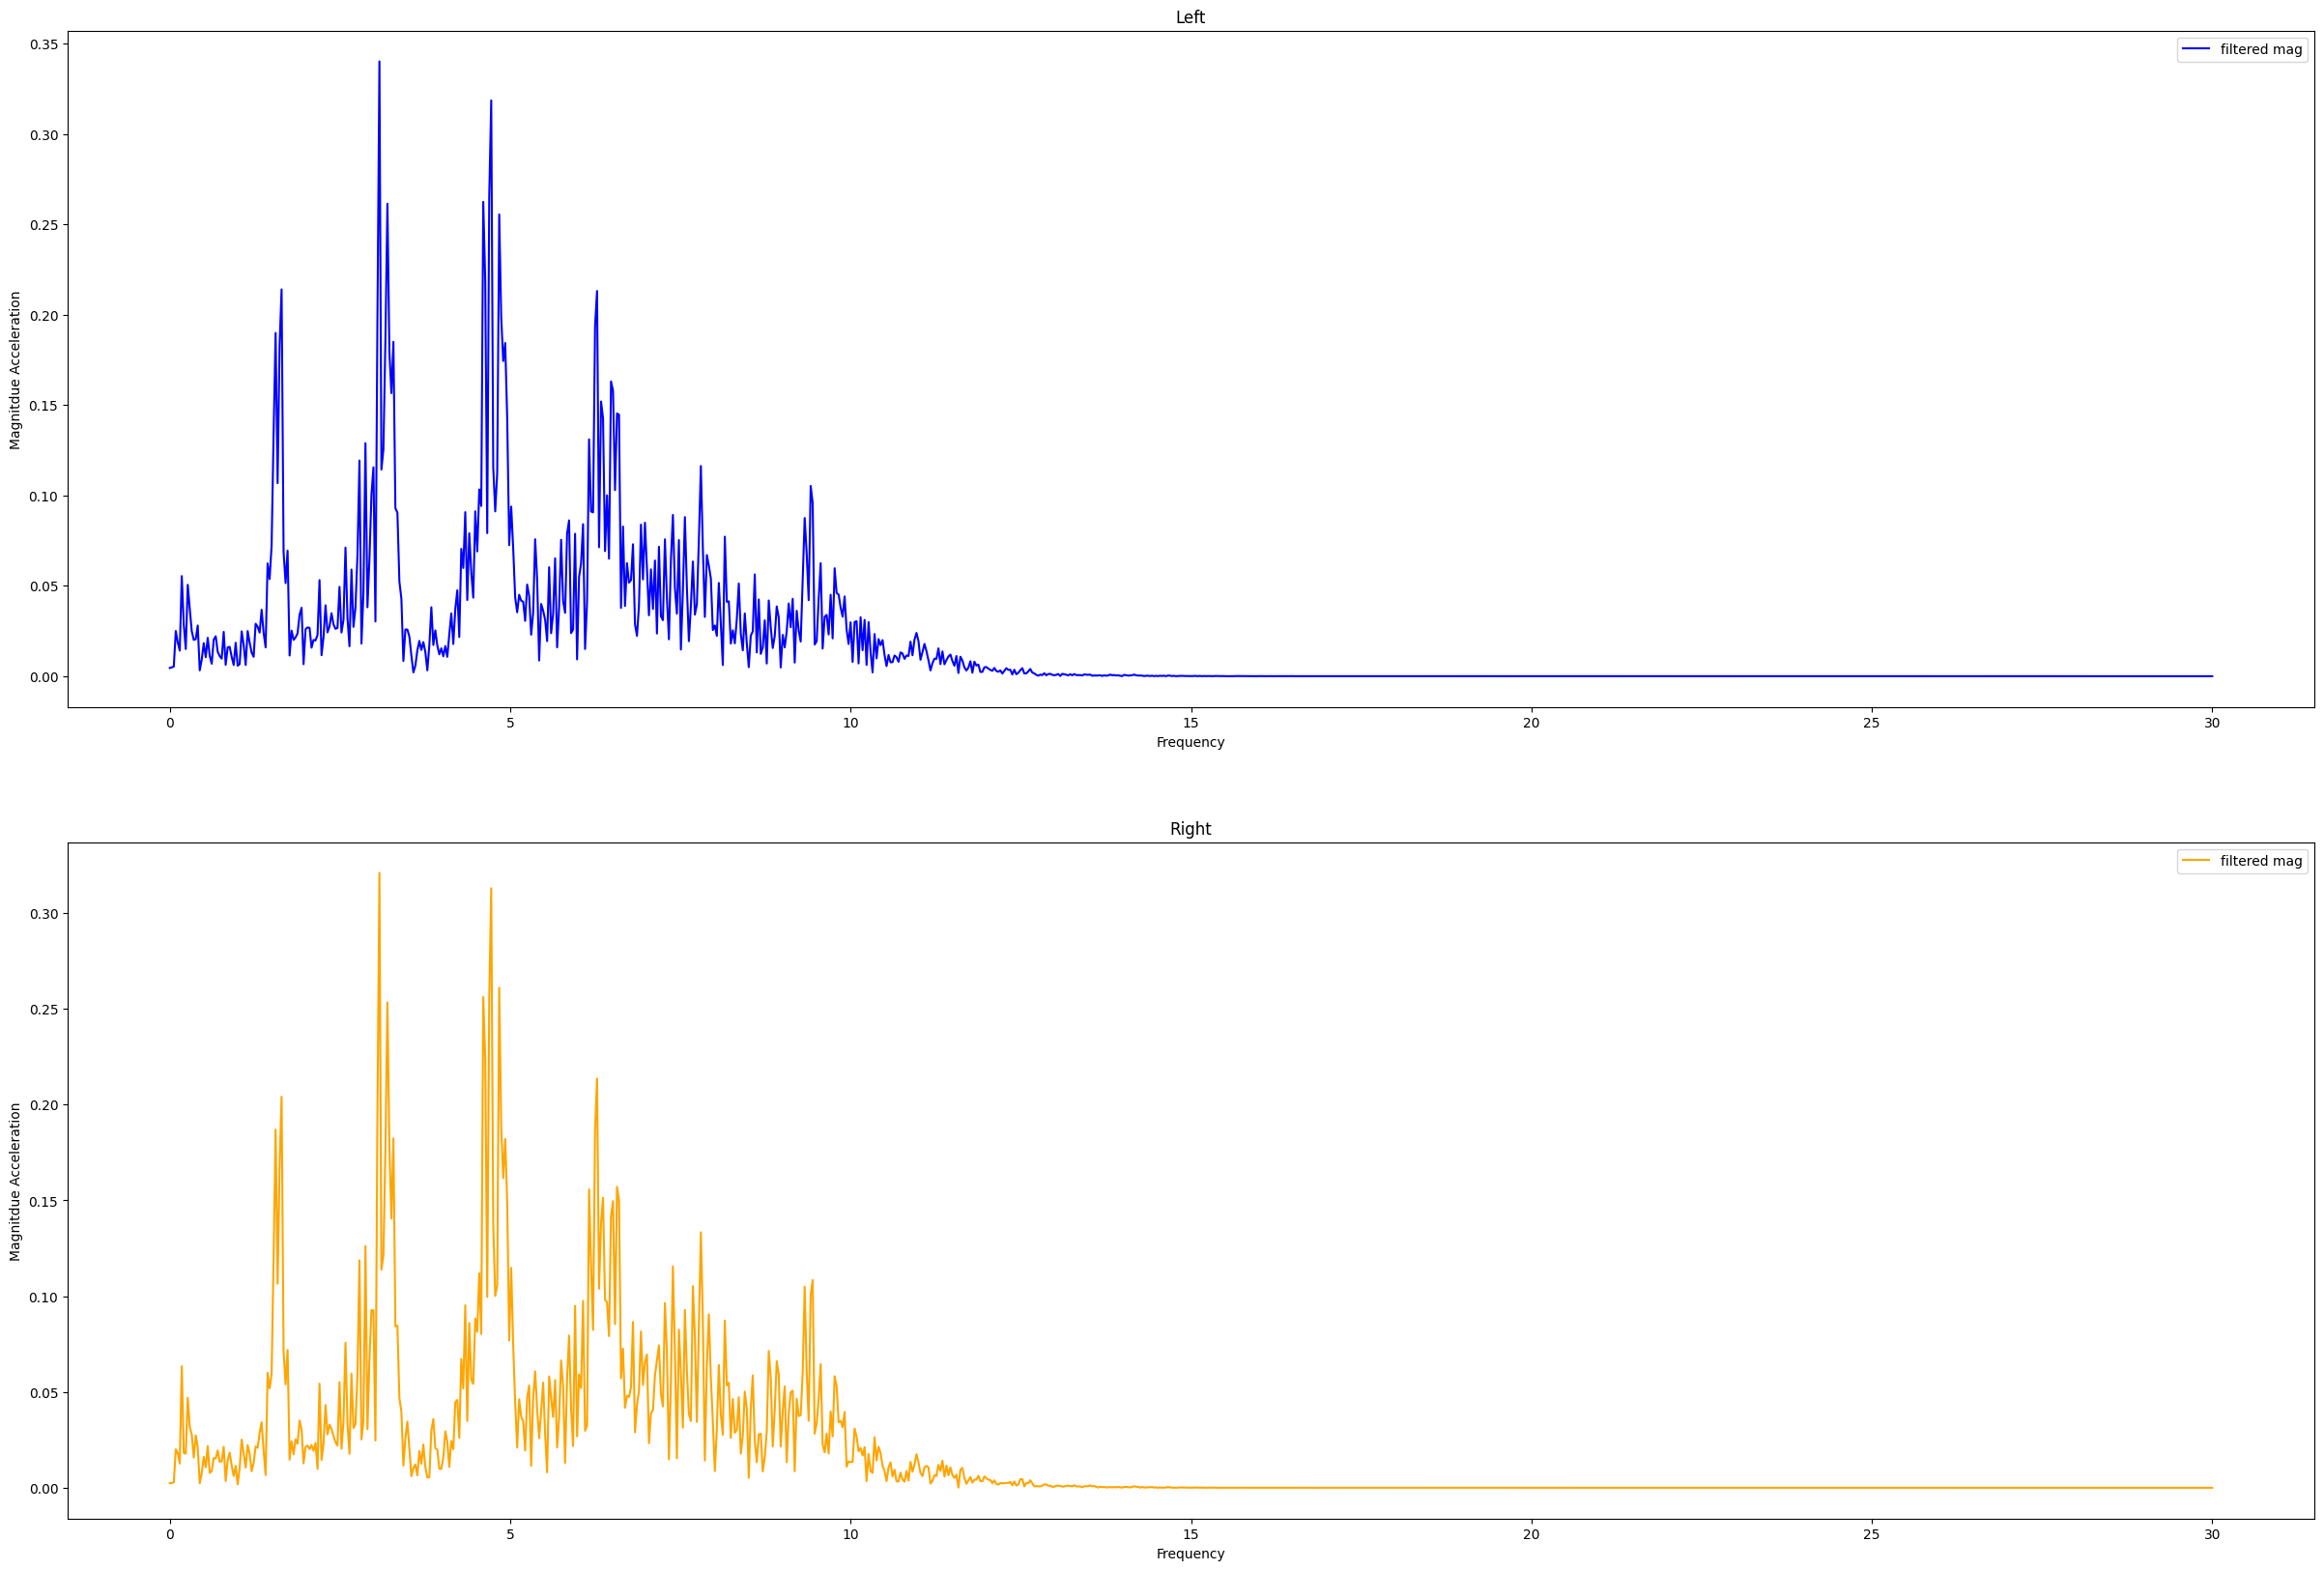

In [6]:
fig, ax = plt.subplots(2,1, figsize=(30, 20))

# Add labels, title, and legend
ax[0].plot(l_fft_graph[0], l_fft_graph[1], color="blue", label="filtered mag")
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Magnitdue Acceleration')
ax[0].set_title('Left')
ax[0].legend()

ax[1].plot(r_fft_graph[0], r_fft_graph[1], color="orange", label="filtered mag")
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Magnitdue Acceleration')
ax[1].set_title('Right')
ax[1].legend()